`jupyter`交互式绘图 : `%matplotlib notebook` (声明一次)
### 1. 简单的例子

In [1]:
import matplotlib.pyplot as plt
import numpy as np
 # 声明开启notebook的plot
%matplotlib notebook

[0 1 2 3 4 5 6 7 8 9]


<IPython.core.display.Javascript object>


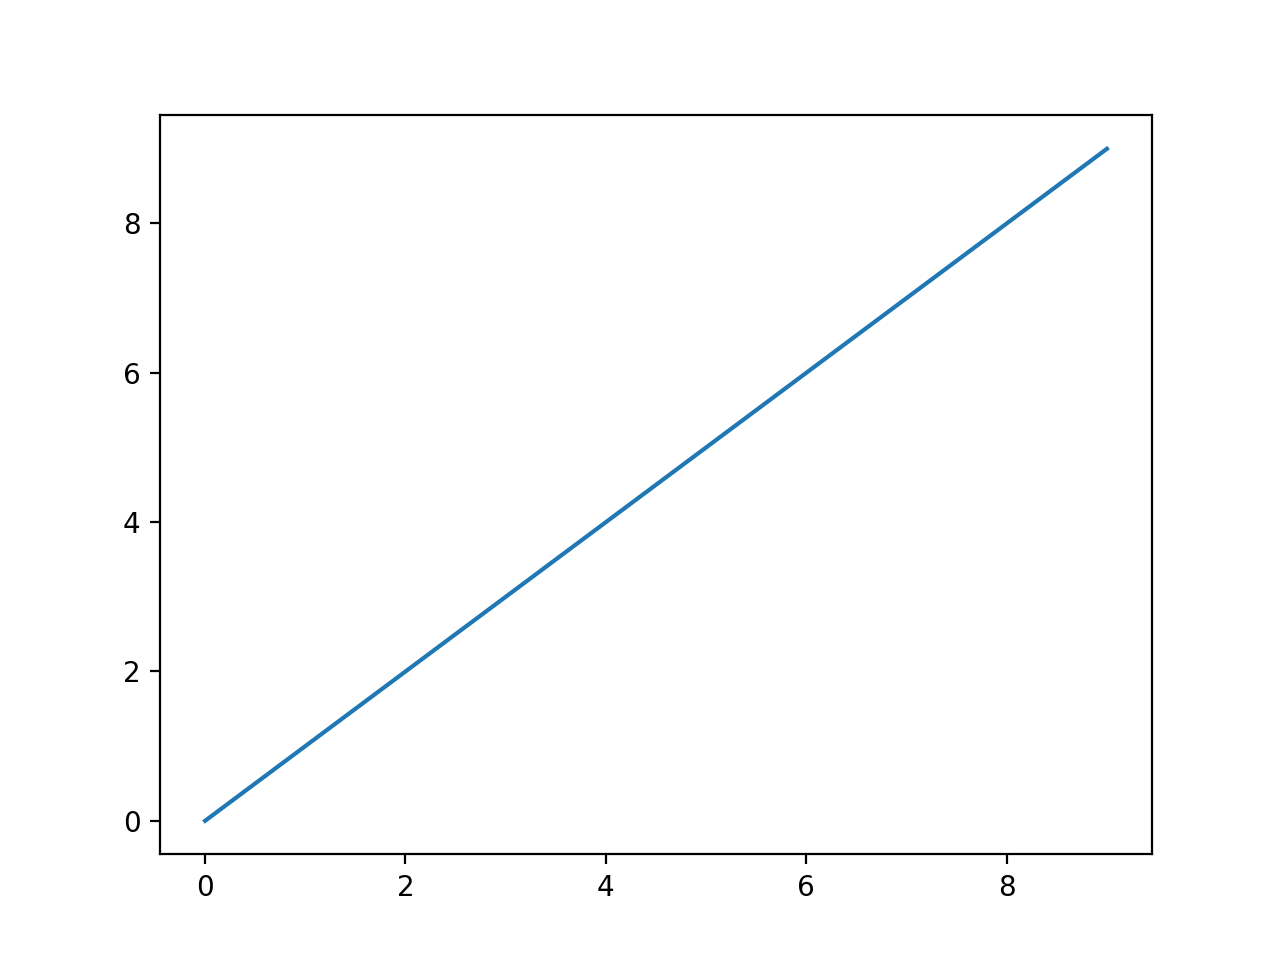

In [7]:
data = np.arange(10)
print data
plt.plot(data)

###  Figure布局
matplotlib的图像位于Figure对象中  
figure为一个空白画布

<IPython.core.display.Javascript object>


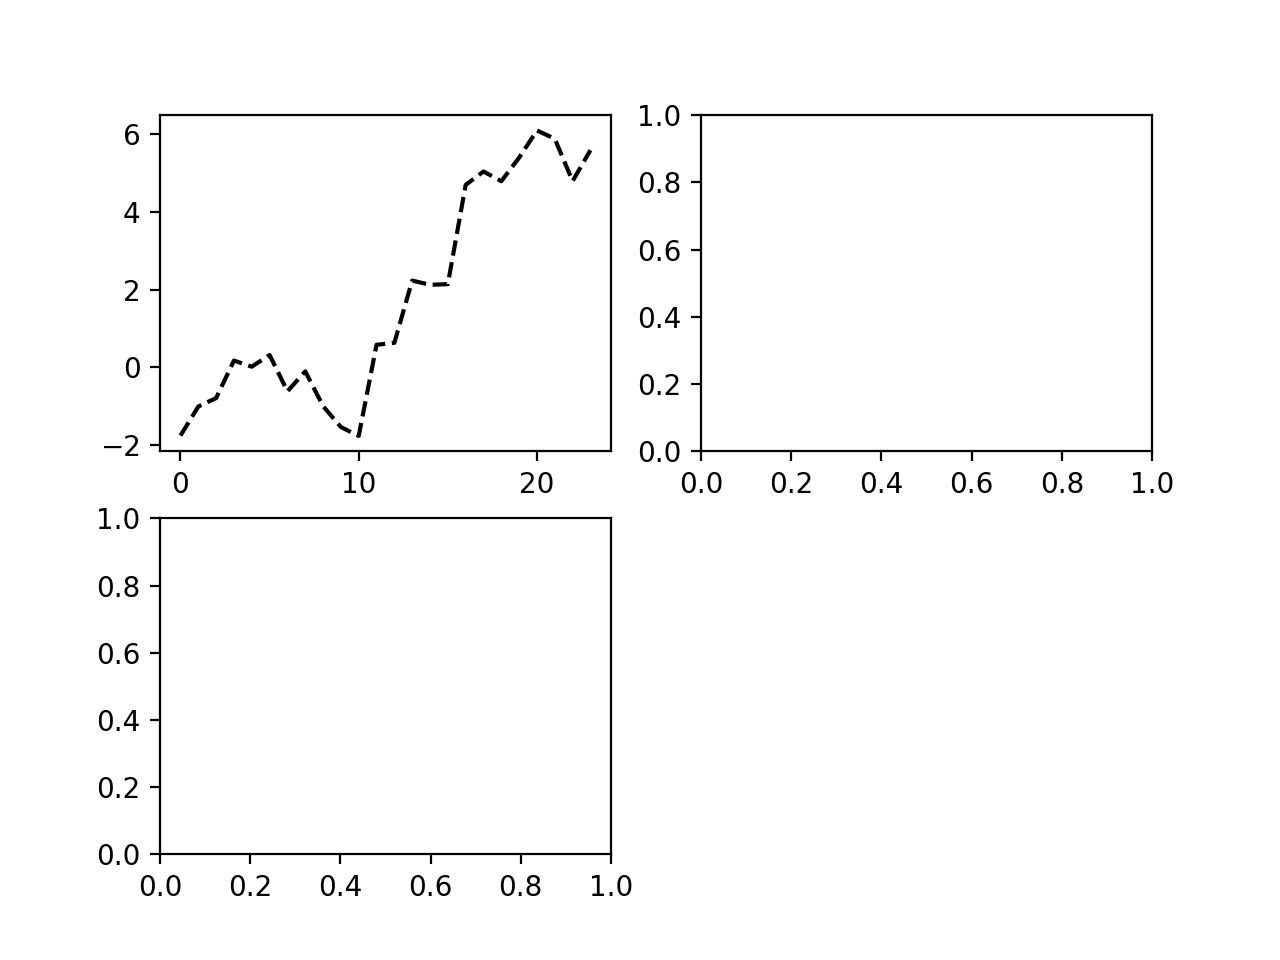

[-1.75037984 -1.00355706 -0.78609178  0.17764427  0.02057541  0.32065729
 -0.61414538 -0.09906779 -0.99300759 -1.53190894 -1.75945932  0.58323057
  0.63370556  2.23445905  2.12451956  2.14189317  4.6919465   5.03802891
  4.78789243  5.39289827  6.09193869  5.87905237  4.78840436  5.58498814]


In [8]:
fig = plt.figure() # 创建一个空白画布
# 在画布上创建4个子图的布局
fig.add_subplot(2,2,1)
# 在第一个子图位置上绘图
data = np.random.randn(24).cumsum()
print data
plt.plot(data,'k--') # 'k--'黑色虚线
fig.add_subplot(2,2,2)
fig.add_subplot(2,2,3)
# fig.add_subplot(2,2,4)

### subplot布局
1. `plt.subplots`: 直接创建画布figure和2\*3的子图  
2. 调整子图之间的间距 : `plt.subplots_adjust(left, bottom, right, top, wspace, hspace)`

<IPython.core.display.Javascript object>


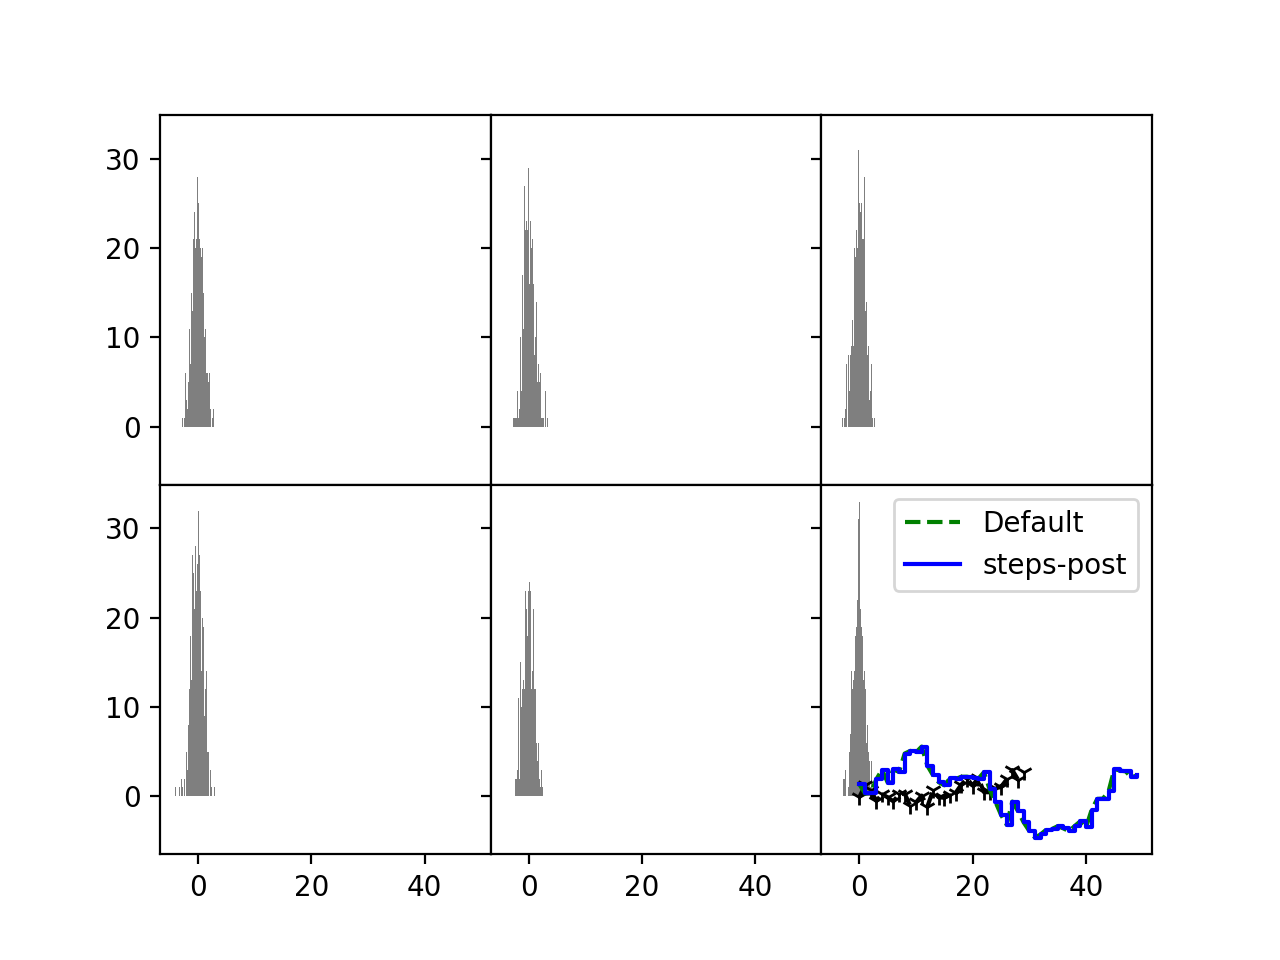

[[<matplotlib.axes._subplots.AxesSubplot object at 0x114bcfe10>


In [9]:
fig,axes = plt.subplots(2,3,sharex=True,sharey=True) # 创建画布和子图
print axes
for i in range(2):
    for j in range(3):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色,标记和线行
1. 颜色和线行, 可以简化成字符串表示, 也可以分开用参数表示. 如下两种表示方式相同:  
  1. 'g--' = linestyle='--',color='g'  
  [颜色可以用单词缩写, 也可用颜色码（例如，'#CECECE'）](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colors.html)  
  [线行也有多种](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html) 
  2. 一个图中可以有多个线性和颜色的图形, 通过参数label='labelname',并开启图例展示`plt.legend('best')` 在图形左上角产生图例提示
2. 线图可以强调标记点  
 标志出图中节点的位置, 可使用参数marker='o', 或简化成字符表示.   
 也可以与颜色线型组成字符串.  , 单顺序必须是(颜色, marker, 线型)
 <img src="../../img/colormarkerlinestyle.png" height='100%' width='100%'>
3. plot方法中, 数据点之间默认按照线性插值进行连接.  
 也可指定参数drawstyle=[‘default’ | ‘steps’ | ‘steps-pre’ | ‘steps-mid’ | ‘steps-post’], 更改差值方法

In [10]:
plt.plot(np.random.randn(30).cumsum(), 'k1--')

<IPython.core.display.Javascript object>


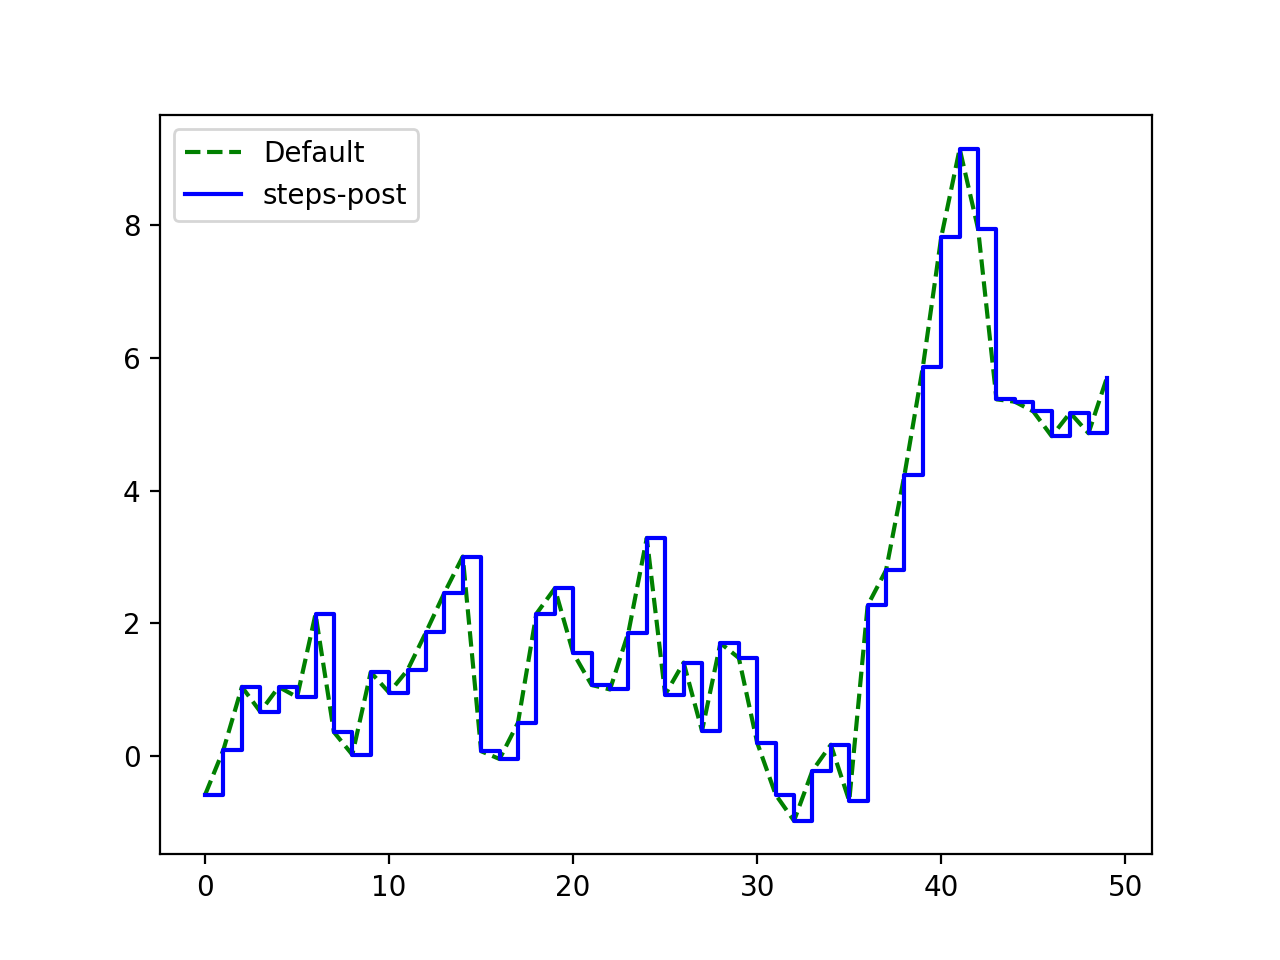

In [4]:
# 更改差值方法和label提示
data = np.random.randn(50).cumsum()
plt.plot(data,'g--',label='Default')
plt.plot(data,'b-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best') # 产生图例提示

### 设置x轴y轴的刻度及标签
1. `AxesSubplot.set_xticks(list(number))` : 设置x轴上的刻度
2. `AxesSubplot.set_xlabel('xlabel')` : 设置x轴标签
3. `AxesSubplot.set_title('title')` : 设置图片的标签  
[注] : y轴标签,刻度设置与之相同, 只要方法中把x改为y

<IPython.core.display.Javascript object>


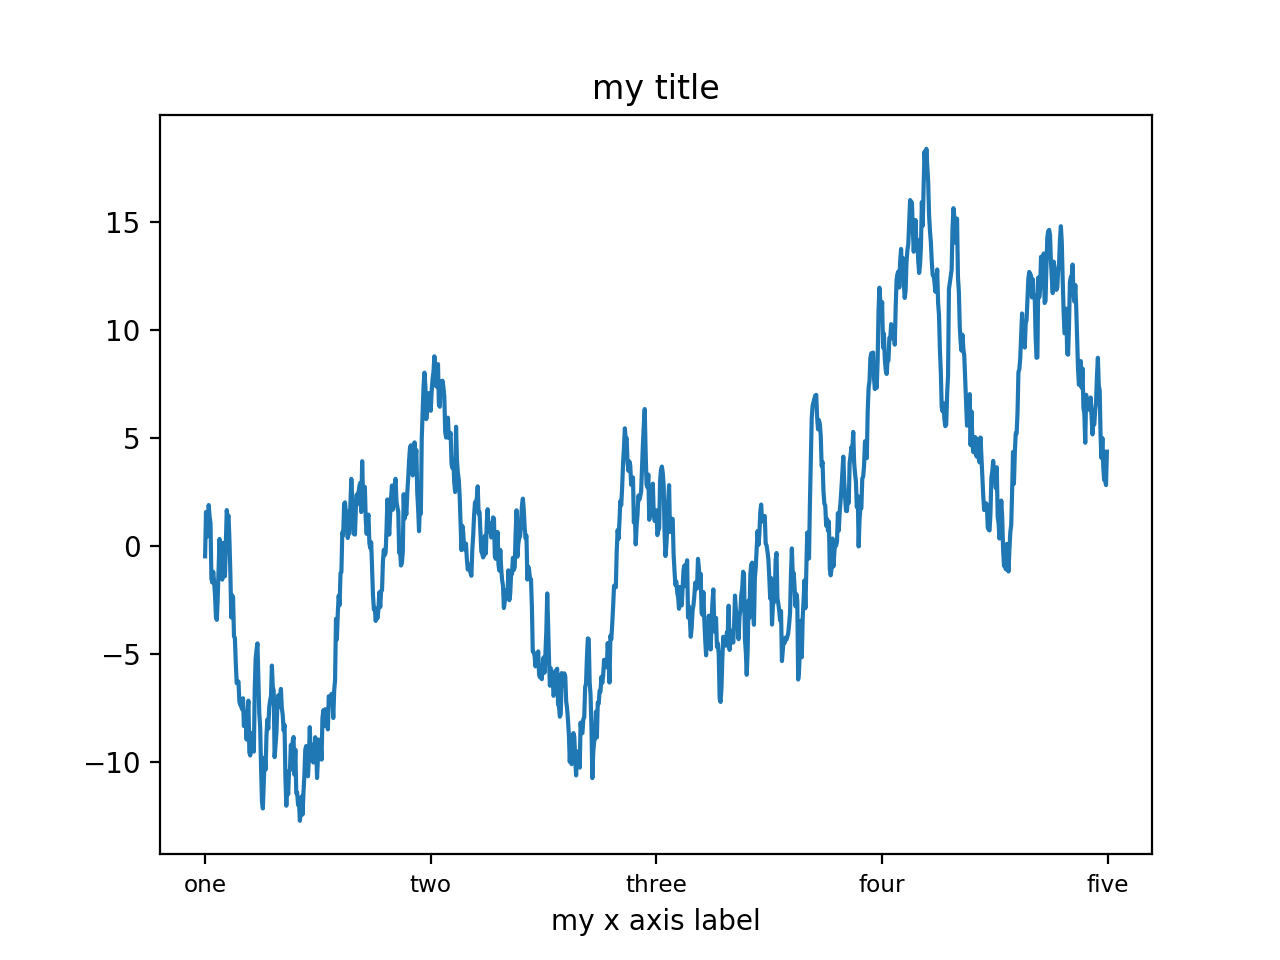

In [15]:
fig = plt.figure()
axsubplot = fig.add_subplot(1,1,1)
axsubplot.set_xticks([0,250,500,750,1000])
axsubplot.set_xticklabels(['one', 'two', 'three', 'four', 'five'],fontsize='small')
axsubplot.set_xlabel('my x axis label')

axsubplot.set_title('my title')

axsubplot.plot(np.random.randn(1000).cumsum())


### 添加图例
1. AxesSubPlot在调用plot方法绘图时, 传入label参数, 可在图中生成图例. 来展现同一个坐标轴下, 不同的颜色和线形
2. AxesSubPlot.legend('best') : 打开图例

<IPython.core.display.Javascript object>


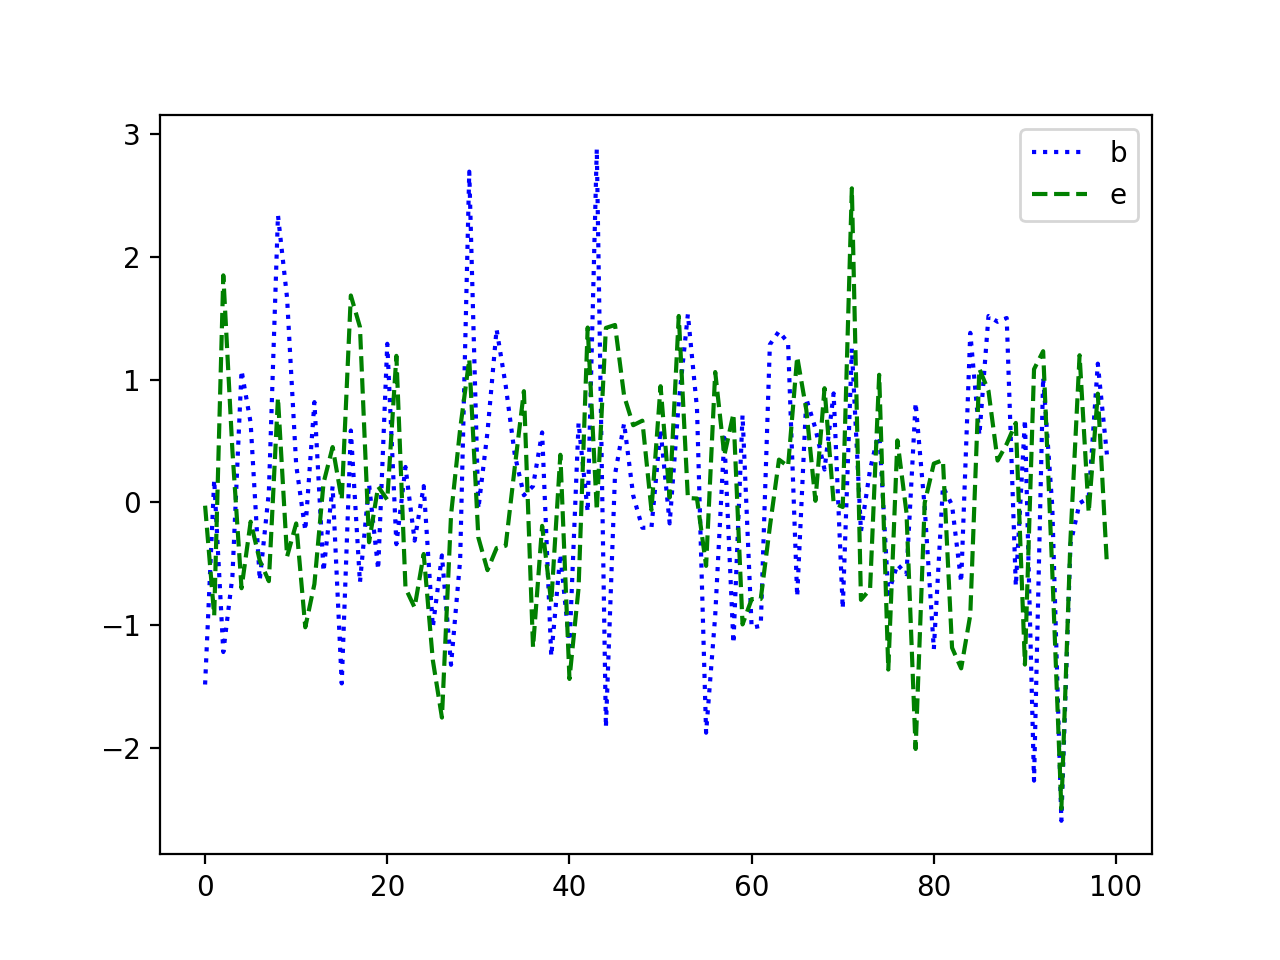

In [6]:
fig = plt.figure()
axesubplot1 = fig.add_subplot(1,1,1)

axesubplot1.plot(np.random.randn(100),'b:',label='one')
axesubplot1.plot(np.random.randn(100),'g--',label='two')

axesubplot1.legend('best')

<IPython.core.display.Javascript object>


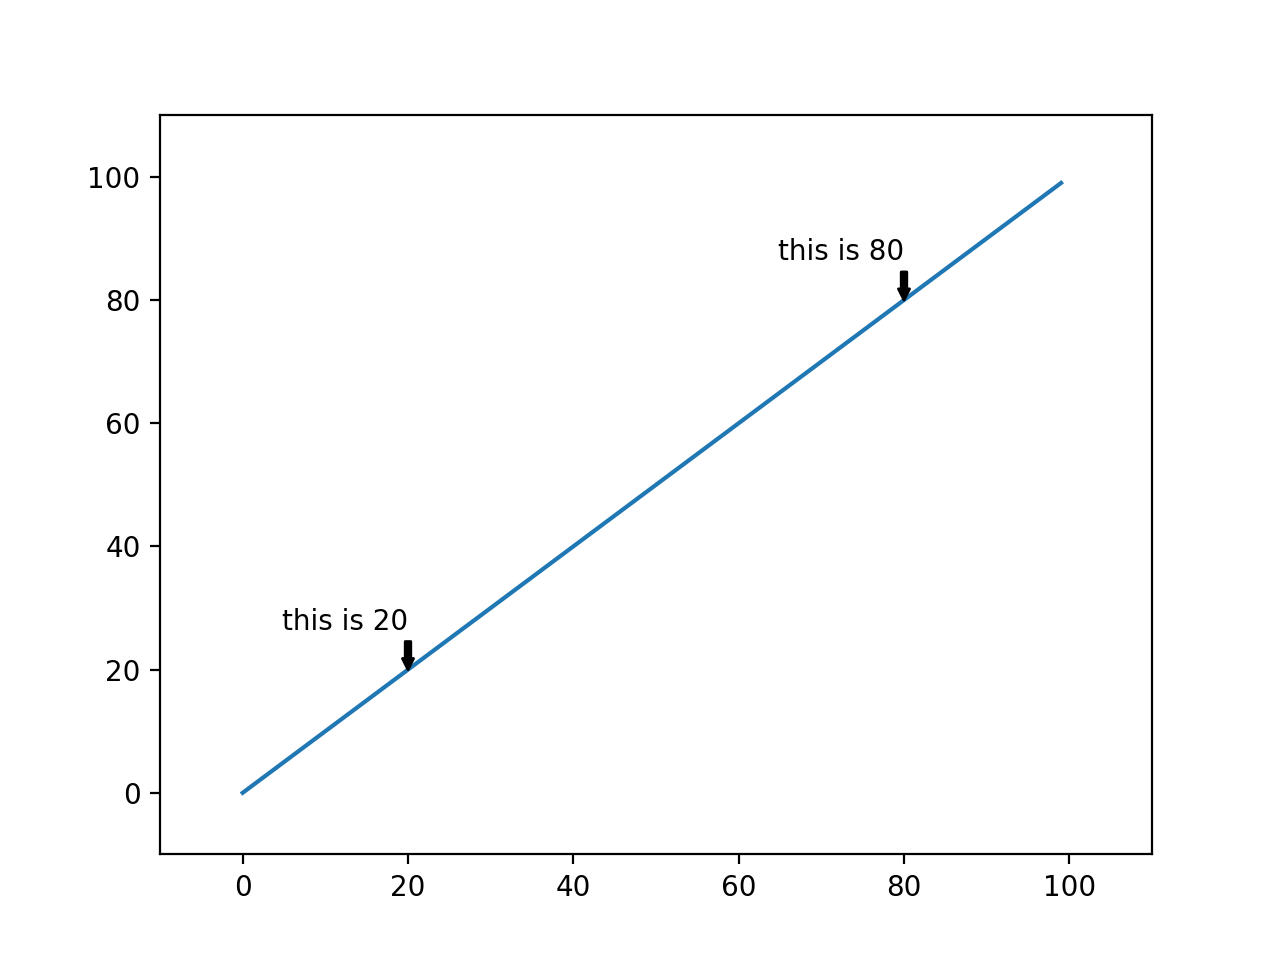

In [21]:
ax = plt.figure().add_subplot(1,1,1)
data = np.arange(100)
ax.plot(data)

importantdata = [(20,'this is 20'),(80,'this is 80')]
for obj,label in importantdata:
    ax.annotate(label,
                xy=(obj,obj),
               xytext=(obj,obj+10),
               arrowprops=dict(facecolor='black',headwidth=4,headlength=4, width=2), # 箭头宽度, 箭头长度, 尾部正方形的宽度
               horizontalalignment='right',  # 箭头在文字右边
               verticalalignment='top')
    
ax.set_xlim(-10,110)  # 人工设置坐标起始,终止位置
ax.set_ylim(-10,110)
ax.set_label('my label')

### 保存文件
1. 保存一个最小白边, 且分辨率为400dpi的png图像  
 plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
 
2. savefig可写入IO对象中
```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```